<a href="https://colab.research.google.com/github/sandeepkhcltech/aiml/blob/main/house_price_prediction_linear_regression_frameworksWith3DPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

python implementation of multivariate linear Regression on using house price prediction dataset

step 1: import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



step 2: reading the data and splitting it to input and output

In [10]:
dataset = pd.read_csv('https://raw.githubusercontent.com/enuguru/aiandml/refs/heads/master/machine_learning_algorithms_using_frameworks/python_files/regression/house_price_prediction/home.csv', header=None)
dataset.columns = ['area', 'bedrooms', 'price']
#inputx = dataset.iloc[:, :-1].values
inputx = dataset.iloc[:, 0:2].values
outputy = dataset.iloc[:, 2].values
print(outputy)

[399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


step 3: select one fourth of the data for testing and two thirds for training

In [4]:
input_train, input_test, output_train, output_test = train_test_split(inputx, outputy, test_size = 1/4, random_state = 0)

step 4: selecting the simple Linear Regression model

In [5]:
model = LinearRegression()
print("\nThe parameters of the model are\n\n",model.get_params())
#print(model.set_params())
print("\nThe model we are using is ", model.fit(input_train, output_train))


The parameters of the model are

 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

The model we are using is  LinearRegression()


step 5: testing or model prediction using testinput

In [6]:
squarefeet = float(input("\nGive square feet of the house  "))
bedrooms = float(input("\nGive the number of bed rooms in the house  "))
testinput = [[squarefeet,bedrooms]]
predicted_output = model.predict(testinput)
print('\nThe test input is as follows ',testinput)
print('\nThe predicted house price is ',predicted_output)
yes = input("\nCan I proceed\n")


Give square feet of the house  2000

Give the number of bed rooms in the house  2.5

The test input is as follows  [[2000.0, 2.5]]

The predicted house price is  [350347.60331664]

Can I proceed



step 6: Printing the testing results

In [7]:
print("\nThe test input (square feet and the number of bed rooms) is as follows \n")
print(input_test)
# model predicting the Test set results
predicted_output = model.predict(input_test)
print("\nThe predicted price of the house for the test input is as follows \n")
print(predicted_output)


The test input (square feet and the number of bed rooms) is as follows 

[[1458    3]
 [1962    4]
 [2637    3]
 [1985    4]
 [2000    3]
 [2040    4]
 [1839    2]
 [1890    3]
 [1888    2]
 [3137    3]
 [1000    1]
 [2162    4]]

The predicted price of the house for the test input is as follows 

[268203.87932324 329342.1484953  435569.69829698 332607.13054483
 345143.89109912 340414.69631545 332696.44118744 329528.75955789
 339652.27251036 506547.56893893 224002.99868527 357733.29675208]


Visualize the **data**

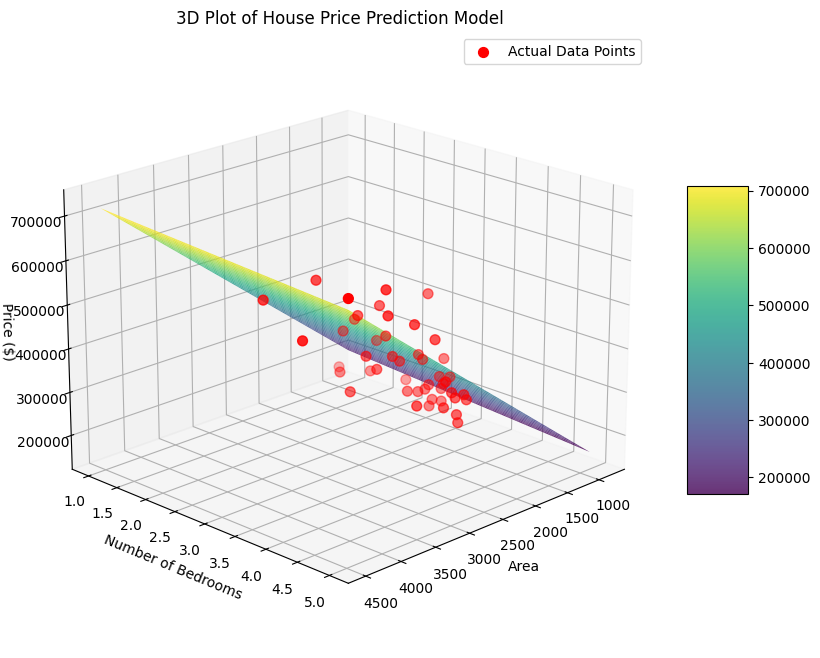

Model Coefficients:
Area coefficient: 141.96
Bedrooms coefficient: -10407.42
Intercept: 92454.68


In [11]:
# Create meshgrid for 3D surface plot
area_range = np.linspace(dataset['area'].min(), dataset['area'].max(), 30)
bedrooms_range = np.linspace(dataset['bedrooms'].min(), dataset['bedrooms'].max(), 30)
X, Y = np.meshgrid(area_range, bedrooms_range)
Z = model.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the actual data points
ax.scatter(dataset['area'], dataset['bedrooms'], dataset['price'],
           color='red', s=50, label='Actual Data Points')

# Customize the plot
ax.set_xlabel('Area')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
ax.set_title('3D Plot of House Price Prediction Model')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add legend
ax.legend()

# Adjust the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

# Print model coefficients
print(f"Model Coefficients:")
print(f"Area coefficient: {model.coef_[0]:.2f}")
print(f"Bedrooms coefficient: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")